In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
train=pd.read_csv('train.csv')
# preview the data
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


891 data sample

In [4]:
test = pd.read_csv('test.csv')
# preview the data
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


177 null data in Age category

687 null data in Cabin category

2 null data in Embark category


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Doharr, Mr. Tannous",male,347082,G6,S
freq,1,577,7,4,644


In [7]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


Female has significant higher survived rate

In [8]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by='Survived',ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


Pclass = 1(1st class) has significant higher survived rate

In [9]:
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by='Survived',ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [10]:
train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by='Survived',ascending=True)

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


Embarked = C(Cherbourg) has significant higher survived rate

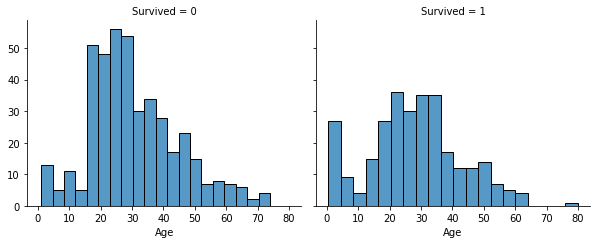

In [11]:
#g = sns.FacetGrid(train, col="Survived")
#g.map_dataframe(sns.histplot, x="total_bill")

g = sns.FacetGrid(train, col="Survived", height=3.5, aspect=1.2)
g.map(sns.histplot, "Age",bins=20)

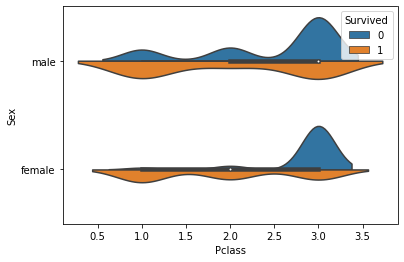

In [12]:
g = sns.violinplot(train['Pclass'], train['Sex'],hue=train["Survived"],split=True)


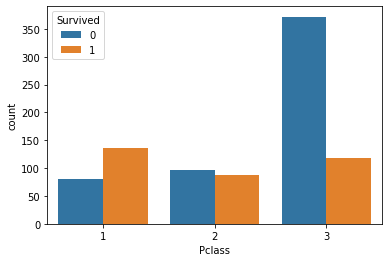

In [13]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()

In [14]:
train.drop_duplicates(subset ="PassengerId",keep = False, inplace = True)
test.drop_duplicates(subset ="PassengerId",keep = False, inplace = True)

In [15]:
train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

#same processing for test dataset
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [16]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [17]:
#median age for Pclass 1
a=train.groupby('Pclass').median()['Age'].iloc[0]
#median age for Pclass 2
b=train.groupby('Pclass').median()['Age'].iloc[1] 
#median age for Pclass 3
c=train.groupby('Pclass').median()['Age'].iloc[2] 

In [18]:
def fillAge_train(x):
    age=x[0]
    pclass=x[1]
    if pd.isnull(age):
        if pclass==1:
            return a
        elif pclass==2:
            return b
        else:
            return c
    else:
        return age
train['Age']=train[['Age','Pclass']].apply(fillAge_train,axis=1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [20]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [22]:
a=test.groupby('Pclass').median()['Age'].iloc[0]
b=test.groupby('Pclass').median()['Age'].iloc[1]
c=test.groupby('Pclass').median()['Age'].iloc[2]
def fillAge_test(x):
    age=x[0]
    pclass=x[1]
    if pd.isnull(age):
        if pclass==1:
            return a
        elif pclass==2:
            return b
        else:
            return c
    else:
        return age

test['Age']=test[['Age','Pclass']].apply(fillAge_test,axis=1)  

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [24]:
med_fare = test['Fare'].median()
if test['Fare'].isnull:
    test['Fare'] = med_fare

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


Find string label

In [26]:
for label,content in train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex
Embarked


In [27]:
for label,content in train.items():
    if not pd.api.types.is_string_dtype(content):
        print(label)

Survived
Pclass
Age
SibSp
Parch
Fare


In [28]:
train.Sex = [1 if each == "female" else 0 for each in train.Sex]
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S


One-hot Encoding

In [29]:
du = pd.get_dummies(train['Embarked'],drop_first=False)
train = pd.concat([train,du],axis=1)
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1


In [30]:
train.drop('Embarked',axis=1,inplace=True)
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

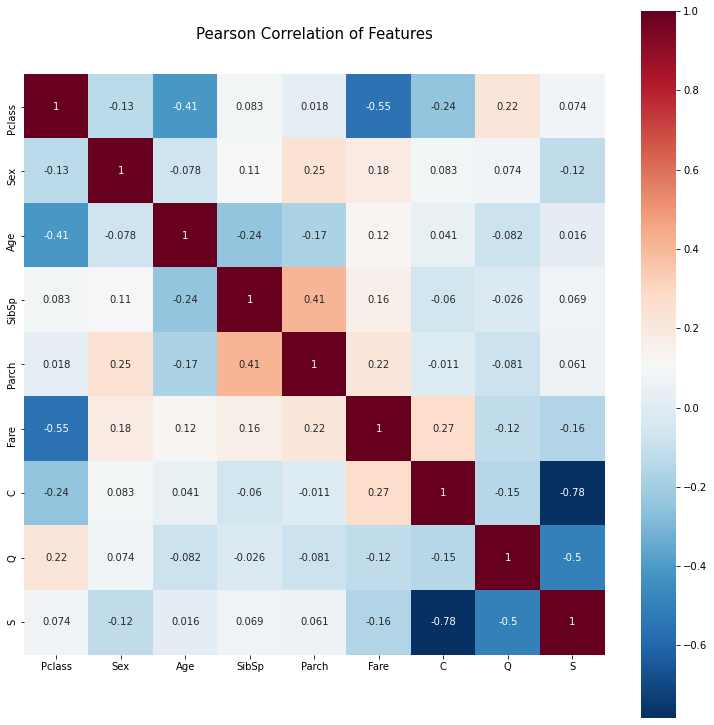

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.iloc[:,1:].astype(float).corr(),vmax=1.0, square=True,cmap="RdBu_r",annot=True)

In [32]:
X = train.iloc[:,1:]
y = train.iloc[:,[0]]

In [33]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


## Data Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

## KNN

Max accuracy at K = 11
Max accuracy is 0.8379888268156425


Text(0, 0.5, 'score')

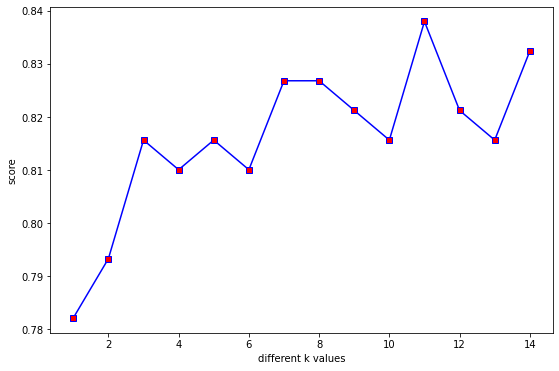

In [36]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

maxAccuracy = score_list.index(max(score_list))

print('Max accuracy at K = '+str(maxAccuracy+1))
print('Max accuracy is ' + str(score_list[maxAccuracy]))
plt.figure(figsize=(9,6))
plt.plot(range(1,15),score_list,color='blue', marker='s',markerfacecolor='red')
plt.xlabel("different k values")
plt.ylabel("score")



In [37]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(x_train,y_train)
print("Accuracy for K = 11 is {}".format(knn_11.score(x_test,y_test)))

Accuracy for K = 11 is 0.8379888268156425


In [38]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
scores_knn = cross_val_score(knn_11, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores_knn.mean())

0.8148189762796504


# Support Vector Machine

In [39]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
print("SVM Score is: {}".format(svm_linear.score(x_test,y_test)))

SVM Score is: 0.7877094972067039


In [40]:
svm_linear=SVC(kernel='linear')
scores_linear = cross_val_score(svm_linear, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores_linear.mean())

0.786729088639201


In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
pred_rbf=svm_rbf.predict(x_test)
print(accuracy_score(y_test,pred_rbf))
print("svm_rbf Score is: {}".format(svm_rbf.score(x_train,y_train)))

0.8044692737430168
svm_rbf Score is: 0.8426966292134831


In [42]:
svm_linear=SVC(kernel='rbf')
scores_linear = cross_val_score(svm_linear, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores_linear.mean())

0.8237827715355804


In [43]:
svc = SVC()
svc.fit(x_train, y_train)
#Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

84.27

## XGBoost

In [44]:
from xgboost import XGBClassifier
#initialize our object
xgbclassifier=XGBClassifier()

#fit train data
xgbclassifier.fit(x_train,y_train)

#predictions
pred_xgb=xgbclassifier.predict(x_test)
print(accuracy_score(y_test,pred_xgb))

[15:58:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8491620111731844


In [48]:
test.Sex = [1 if each == "female" else 0 for each in test.Sex]
du = pd.get_dummies(test['Embarked'],drop_first=False)
test = pd.concat([test,du],axis=1)
test.drop('Embarked',axis=1,inplace=True)
test.head(3)

AttributeError: 'numpy.ndarray' object has no attribute 'Sex'

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)
test = scaler.transform(test)

In [54]:
#run for submission
subm_xtest= test
pred_xgb_subm=xgbclassifier.predict(subm_xtest)

In [55]:
#Convert to CSV file
subm.to_csv(r'Result.csv', index = False)